# Getting Started

The data to be analyzed in SciSci includes not only academic literature (articles, letters, reviews, books, and book chapters) but also authors, research institutions, and funding (research grants).

The databases include both commercial databases (such as Scopus) and open-access databases. Open-access databases often used include the following, and Python libraries are also well-supported. (Cited from the [pyscisci](https://github.com/SciSciCollective/pyscisci) GitHub repository)

| Data Set      | Example |
| ----------- | ----------- |
| [Microsoft Academic Graph](https://docs.microsoft.com/en-us/academic-services/graph/) (MAG)      | [Getting Started with MAG](/examples/Getting_Started/Getting%20Started%20with%20MAG.ipynb)       |
| [Clarivate Web of Science](https://clarivate.com/webofsciencegroup/solutions/web-of-science/) (WoS)   | [Getting Started with WOS](/examples/Getting_Started/Getting%20Started%20with%20WOS.ipynb)        |
| [DBLP](https://dblp.uni-trier.de) | [Getting Started with DBLP](/examples/Getting_Started/Getting%20Started%20with%20DBLP.ipynb) |
| [American Physical Society](https://journals.aps.org/datasets) (APS) | [Getting Started with APS](/examples/Getting_Started/Getting%20Started%20with%20APS.ipynb) |
| [PubMed](https://www.nlm.nih.gov/databases/download/pubmed_medline.html) | [Getting Started with PubMed](/examples/Getting_Started/Getting%20Started%20with%20PubMed.ipynb) |
| [OpenAlex](https://openalex.org/) | [Getting Started with OpenAlex](/examples/Getting_Started/Getting%20Started%20with%20OpenAlex.ipynb) |

This time, we will use [OpenAlex](https://docs.openalex.org/), which is user-friendly even for beginners, including its [website](https://openalex.org/) UI. The library we will use is [pyalex](https://github.com/J535D165/pyalex?tab=readme-ov-file#pyalex).

Run the following Python notebook on any of the online code execution services. We recommend you to use Google Colaboratory.

In this chapter, we will briefly check what kind of data can be retrieved and in what format.

For more detailed explanations, please refer to https://github.com/J535D165/pyalex?tab=readme-ov-file#pyalex.

# Preparation
In this chapter we show the example statistics and preliminary analyses with bibliographic data.
You can run each section separately, but you run these cells after initialization or runtime.

In [4]:
import sys
import os

env = "local" # "colab" or "local"

if env == "colab":
    %cd /content/sample_data/
    !git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git
    path = '/content/sample_data/scisciJP2024_tutorial'
if env == "local":
    path = 'YOUR_PATH'

sys.path.append(path)
print(os.getcwd())

# os.chdir(path)
# sys.path

/Users/ti/Documents/code/tutorial


In [5]:
%pip install pyalex 
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex

import pandas as pd
import numpy as np
import math
import tqdm
import matplotlib.pyplot as plt

import util

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/ti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
# fill in your email and you get faster retrieve from OpenAlex.
# We do not collect any of your personal information.

pyalex.config.email = "your@email.address" 

In [7]:
# Whole count recorded in Open Alex

print(f"# Publications: {Works().count():,}")
print(f"# Researchers: {Authors().count():,}")
print(f"# Institutions: {Institutions().count():,}")
print(f"# Journals: {Sources().count():,}")
print(f"# Funders: {Funders().count():,}")
print(f"# Topics: {Concepts().count():,}")


# Publications: 258,504,937
# Researchers: 95,668,134
# Institutions: 109,260
# Journals 254,533
# Funders 32,437
# Topic 65,073


# Works
Data for academic papers
see [OpenAlex API Detail page]() to learn more filters you can apply.

In [6]:
# Extract papers published from 1950 to 2023.
# With each API request to Open Alex takes around a second, the calls take a maximum 75 second in total.

year_range = range(1950, 2024)

# count() function retrieve the count of the works
num_publish = [Works().filter(publication_year=i).select(["id"]).count() for i in year_range]

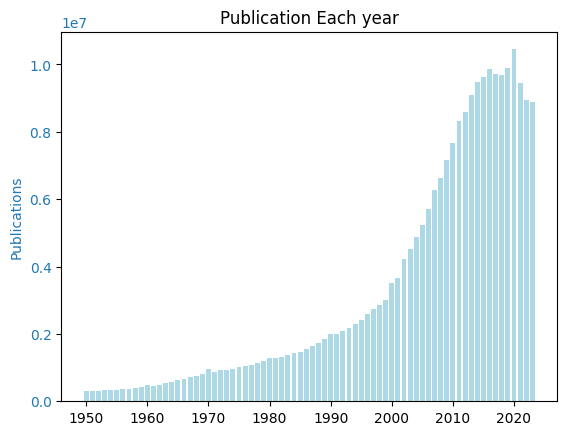

2010年以降、合計 123,279,315 件が発行されている


In [18]:
# Visualize
# If you want to learn how to visualize better, visit:
# Visualization is out of our scope.

x = np.arange(year_range[0], year_range[-1]+1)

plt.ylabel('Publications', color='tab:blue')
plt.bar(x, num_publish, width=0.8, color='lightblue', label='Publications each year')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.title("Publication Each year")
plt.show()

print(f"From 2010, in total { Works().filter(publication_year='>2010').select(['id']).count() :,} papers have been issued")

The graph shows that the number of papers published is exponentially increasing.
This means that half of the papers ever published are published within the most recent decade, despite the long history of academic findings.

$$
\int_{-\infty}^{Y_0} C exp( \beta x) = 1  \\

\int_{Y_1}^{Y_0} C exp(\beta x) = 1/2 \\

\frac{C}{\beta} (exp(\beta Y_0) - exp(\beta Y_1)) = 1/2 \\
\frac{C}{\beta} (exp(\beta Y_0)) = 1 \\

1 - \frac{exp(\beta Y_1)}{exp(\beta Y_0)} = 1/2 \\

$$



In [19]:
# Works count by Topics.
# We compare that of 1970 and 2020. Topic is defined by OpenAlex, which is devided into four levels of detail.
# You can find the  pro
# You can put any number you like for year.
fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
for i in range(11,37):
    fields.loc[i,"n_1970"] = Works().filter(publication_year= 1970, primary_topic={"field":{"id":i}}).count()
    fields.loc[i,"n_2020"] = Works().filter(publication_year= 2020, primary_topic={"field":{"id":i}}).count()
fields.sort_values(by="domain_id")

field_name  domain_id  \
field_id                                                            
11                Agricultural and Biological Sciences          1   
13        Biochemistry, Genetics and Molecular Biology          1   
30          Pharmacology, Toxicology and Pharmaceutics          1   
28                                        Neuroscience          1   
24                         Immunology and Microbiology          1   
12                                 Arts and Humanities          2   
14                 Business, Management and Accounting          2   
33                                     Social Sciences          2   
32                                          Psychology          2   
18                                   Decision Sciences          2   
20                 Economics, Econometrics and Finance          2   
31                               Physics and Astronomy          3   
26                                         Mathematics          3   
25                                   Materials Science          3   
23                               Environmental Science          3   
22                                         Engineering          3   
21                                              Energy          3   
19                        Earth and Planetary Sciences          3   
17                                    Computer Science          3   
16                                           Chemistry          3   
15                                Chemical Engineering          3   
27                                            Medicine          4   
29                                             Nursing          4   
34                                          Veterinary          4   
35                                           Dentistry          4   
36                                  Health Professions          4   

                domain_name    n_1970     n_2020  
field_id                                          
11            Life Sciences   71571.0   406574.0  
13            Life Sciences   54069.0   429682.0  
30            Life Sciences    5390.0    27781.0  
28            Life Sciences   11705.0   121093.0  
24            Life Sciences    8012.0    74896.0  
12          Social Sciences   54157.0   503013.0  
14          Social Sciences    9859.0   305594.0  
33          Social Sciences   95797.0  1577180.0  
32          Social Sciences   17532.0   279021.0  
18          Social Sciences    4682.0    91828.0  
20          Social Sciences   13547.0   257651.0  
31        Physical Sciences   35198.0   212559.0  
26        Physical Sciences   13338.0   140190.0  
25        Physical Sciences   24052.0   245310.0  
23        Physical Sciences   30868.0   448128.0  
22        Physical Sciences   79099.0  1022491.0  
21        Physical Sciences    2366.0    63892.0  
19        Physical Sciences   14929.0   149887.0  
17        Physical Sciences   18938.0   631725.0  
16        Physical Sciences   48519.0   125548.0  
15        Physical Sciences    3672.0    22428.0  
27          Health Sciences  143505.0  1592211.0  
29          Health Sciences    4908.0    39901.0  
34          Health Sciences    2782.0    11607.0  
35          Health Sciences    2713.0    39694.0  
36          Health Sciences   20728.0   267996.0

In [ ]:
# Compare the Works count by its relative volume between topics.
fields_sorted = fields.sort_values(by="domain_id")

# calculate ratio
labels = fields_sorted["field_name"]
sizes = fields_sorted["n_1970"]/fields_sorted["n_1970"].sum()
sizes_2010 = fields_sorted["n_2020"]/fields_sorted["n_2020"].sum()

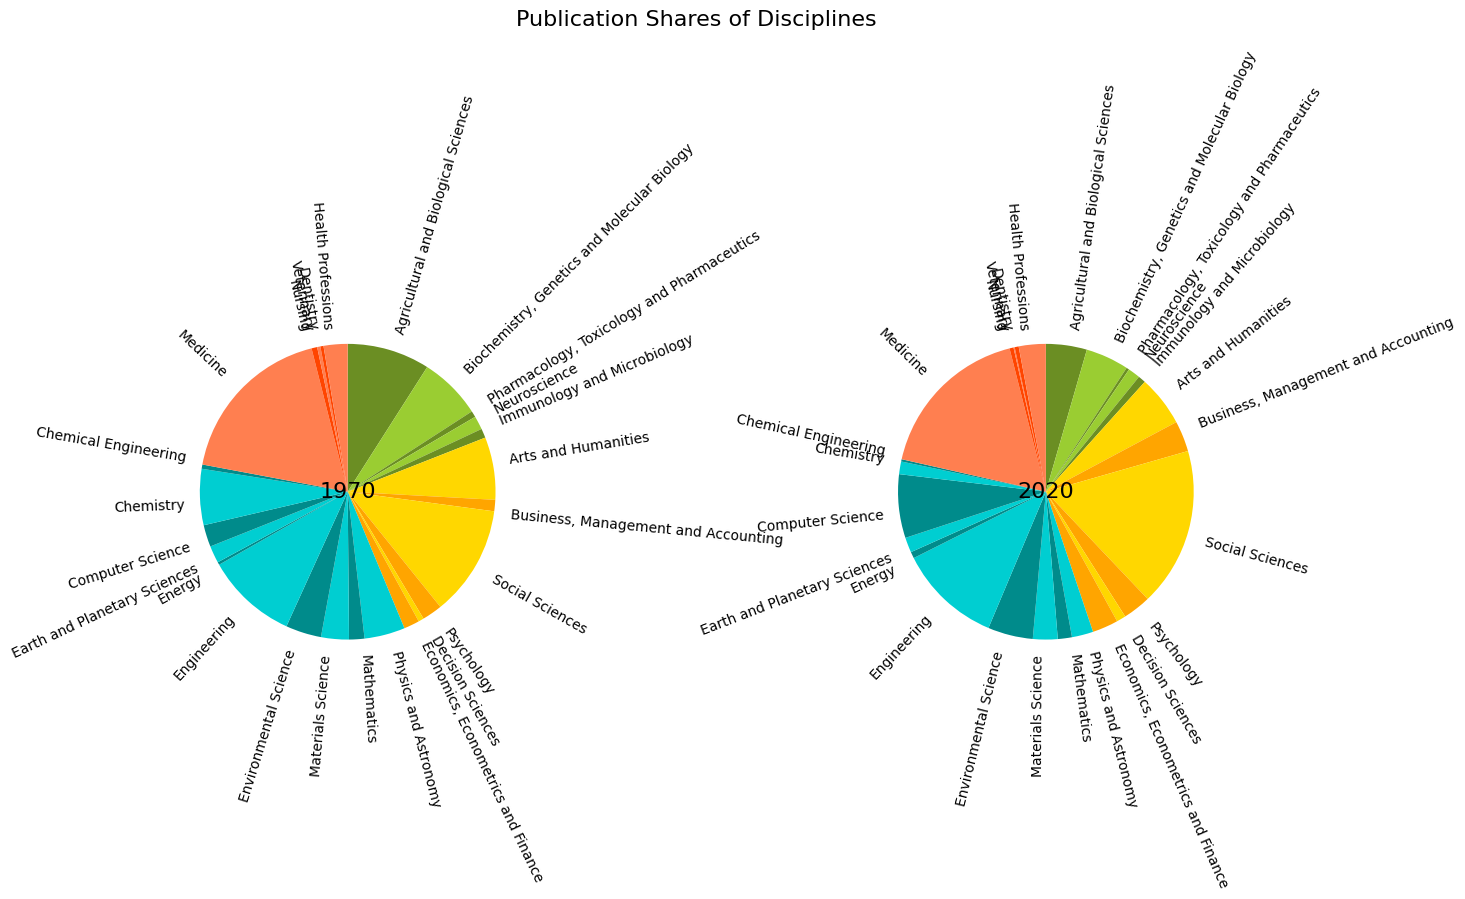

In [21]:
# Visualize
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']

colors_list = []
for i,d in enumerate(fields_sorted["domain_id"]):
    if(i%2==0):colors_list.append(dark_colors[d-1])
    if(i%2==1):colors_list.append(light_colors[d-1])

fig,ax =plt.subplots(1,2)
ax[0].pie(sizes, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[1].pie(sizes_2010, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[0].text(0, 0, '1970', fontsize=16, ha='center', va='center')
ax[1].text(0, 0, '2020', fontsize=16, ha='center', va='center')

plt.subplots_adjust(left=0,right=2)
plt.suptitle("Publication Shares of Disciplines",x=1.0,y=1.5,fontsize=16)
plt.show()

# Authors
Data for researchers.

see [OpenAlex API Detail page]() to learn more filters you can apply.

In [3]:
# We want to obtain the yearly count fo authors, as we did it for works.
# However, author object on OpneAlex does not have the entry for the time a specific author published her first paper.
# Still, We can retrieve it by sending Work API, filtering for each author.
# This execute, however, thousands of API requests and it puts heavy load for OpenAlex server.
# We use the retrieved data ahead of this tutorial.

# # Sampling 10,000 authors
# ids = util.getAll(Authors().sample(10000, seed=42).select(["id"]))

# # Retrieve all the oldest works for each authors
# authors = []
# for id in tqdm.tqdm(ids):
#     year = Works().filter(author={"id":id["id"]}).select(["publication_year"])\
#             .sort(publication_year="asc") \
#             .get()
#     if(len(year)>0):
#         authors.append({"id":id["id"],"year":year[0]["publication_year"]})
# authors = pd.DataFrame(authors)

# pd.to_pickle(authors, "./supplementary/first_publication.pickle")

authors = pd.read_pickle("./supplementary/first_publication.pickle")

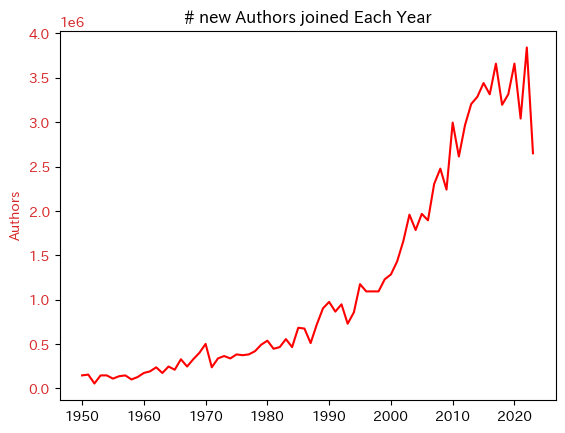

In [6]:
# Visualize
year_range = range(1950, 2024)
x = np.arange(year_range[0], year_range[-1]+1)

authors_share = np.array([len(authors[authors["year"]==i]) for i in year_range])/len(authors)

plt.plot(x, authors_share*Authors().count(), color='r', label='Cumulative Authors')

plt.ylabel('Authors', color='tab:red')
plt.tick_params(axis='y', labelcolor='tab:red')
plt.title("# new Authors joined Each Year")

plt.show()


# Citations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Skewed distribution of citation count
max_citation = 316600
max_works_count = 258237914

# Your choice of country to calculate and compare the academic imbalance
country = "JP" # You can see the list of countries here:

cite_step = [0, 1, 2, 10, 20, 50, 100, 200, 500, 1000]
papers_cited = [Works().filter(cited_by_count=f"<{i+1}").count() for i in cite_step]
papers_cited = [Works().filter(cited_by_count=f"<{i+1}" , authorships={"countries":country}).count() for i in cite_step]

def lorenz_curve(papers_cited):
    cite_steps = np.array([0]+cite_step)
    citation_counts = np.diff([0]+papers_cited)*(cite_steps[1:]+cite_steps[:-1])/2

    # Calculate cumulative distribution function of citation and paper count.
    x_cumulative = [0 ]+list(np.array(papers_cited) / max_works_count) +[1]
    y_cumulative = [0 ]+list(np.cumsum(citation_counts) / np.sum(citation_counts)) +[1]

    # Lorentz Curve
    plt.plot(x_cumulative, y_cumulative, label='Lorenz curve', marker='o') # actual distribution
    plt.plot([0, 1], [0, 1], '--',color='gray', label='Line of equality') # theoritical equality
    plt.fill_between(x_cumulative, y_cumulative, x_cumulative, color='skyblue', alpha=0.3)
    plt.xlabel('Cumulative share of articles')
    plt.ylabel('Cumulative share of citations')
    plt.legend()
    plt.grid(True)

    # Calculate skewness (Gini coefficient)
    gini_index = 1 - 2 * np.trapz(y_cumulative, x=x_cumulative)
    print('Gini coefficient:', f"{gini_index:.4}")
    return x_cumulative, y_cumulative

lorenz_curve(papers_cited)
print("Compare it with world economic imbalance: 0.68 (2005). Higher coefficient means higher imbalance")

plt.show()

SyntaxError: f-string: expecting '}' (34592095.py, line 10)

In [279]:
top_ratio = [0.1,0.05,0.01]

numcitation_thresholds = np.interp([1-p for p in top_ratio], np.array(papers_cited)/max_works_count, cite_step)
for i in range(len(top_ratio)):
    print(f"To rank in top{top_ratio[i]*100}% most cited papers, you need: ",int(numcitation_thresholds[i])+1, "citations")

top10.0%論文被引用数： 19 回以上
top5.0%論文被引用数： 44 回以上
top1.0%論文被引用数： 161 回以上


# Sources

In [2]:
# World largest sources of academic information and metadata.
# Note that Source includes books, repositories and indexers.

source = Sources().filter(works_count=">1000000").get() 

pd.DataFrame(map(lambda x: [x["display_name"], x["host_organization_name"], x["is_oa"],f'{x["works_count"]:,}'],source),
            columns=["Journal Name","Issuer","Is Open Access?", "Total publishment"])


100万本以上論文が出ている論文誌


論文誌名  \
0                                              PubMed   
1                                      PubMed Central   
2                         Europe PMC (PubMed Central)   
3                          arXiv (Cornell University)   
4      DOAJ (DOAJ: Directory of Open Access Journals)   
5   HAL (Le Centre pour la Communication Scientifi...   
6                                     Springer eBooks   
7   Zenodo (CERN European Organization for Nuclear...   
8                 RePEc: Research Papers in Economics   
9                     Social Science Research Network   
10                                  De Gruyter eBooks   

                                           論文誌発行機関  OA誌かどうか     累計論文発行数  
0                    National Institutes of Health    False  33,075,864  
1                    National Institutes of Health     True   8,009,760  
2                European Bioinformatics Institute     True   5,316,266  
3                               Cornell University     True   3,015,170  
4                                             None     True   2,672,478  
5   French National Centre for Scientific Research     True   2,571,027  
6                                  Springer Nature    False   2,519,831  
7       European Organization for Nuclear Research     True   1,405,433  
8                Federal Reserve Bank of St. Louis     True   1,126,422  
9                         RELX Group (Netherlands)    False   1,079,692  
10                                      De Gruyter    False   1,075,912

In [3]:
# Article Processing Charges (APC) of journals
# You can see country code that you can use in any other sections.

journals = pd.DataFrame(util.getAll(\
    Sources().filter(apc_usd=">0")\
        .select(["id","display_name","summary_stats","apc_usd","works_count","country_code"])))
journals["country_code"].unique()

Fetching 11086 objects. it may takes 0.92 to 2.77 minutes


57it [01:03,  1.12s/it]


array(['CH', 'NL', 'GB', 'US', 'AU', 'DE', None, 'DK', 'IE', 'FR', 'HU',
       'JP', 'CA', 'CZ', 'RU', 'IT', 'AT', 'SG', 'BE', 'IN', 'KR', 'CN',
       'ES', 'BR', 'NZ', 'UG', 'UA', 'IR', 'RO', 'TW', 'ZA', 'BG', 'LT',
       'RS', 'SE', 'IL', 'HK', 'EG', 'SK', 'PL', 'ID', 'PK', 'NG', 'SA',
       'CL', 'FI', 'IQ', 'MX', 'HR', 'TR', 'EE', 'NP', 'GR', 'KE', 'MY',
       'AR', 'CO', 'PT', 'BA', 'SI', 'LV', 'NO', 'PH', 'MO', 'TH', 'BD',
       'ME', 'LY', 'KW', 'VN', 'PE', 'LB', 'CY', 'MK', 'AE', 'KG', 'MN',
       'AL', 'QA', 'KZ', 'GH', 'BY', 'YE', 'GU', 'BO', 'LK', 'GM'],
      dtype=object)

In [4]:
# Journals classified by issuers from areas.
# to learn more about h-index, see ch. 4. Two-mean-year citedness is another metrics for the impact of works.

colors = {'NorthAmerica':'navy','Europe':'turquoise', 'Oceania':'orange', 'SouthAmerica':'gold','Africa':'peru','Asia':'deeppink', "n/a":"grey"}

sorted = journals.sort_values(by="works_count",ascending=True)

continent = pd.read_csv("./supplementary/countrycode_continent.csv")\
    .drop("country_name",axis="columns")\
    .set_index("country_code")
sorted = pd.merge(sorted, continent, how="left", on="country_code")
sorted["continent"].fillna("n/a",inplace=True)

sorted["h-index"] = sorted["summary_stats"].apply(lambda x: x["h_index"])
sorted["2yr_mean_citedness"] = sorted["summary_stats"].apply(lambda x: x["2yr_mean_citedness"])
sorted["color"] = sorted["continent"].apply(lambda x: colors[x])

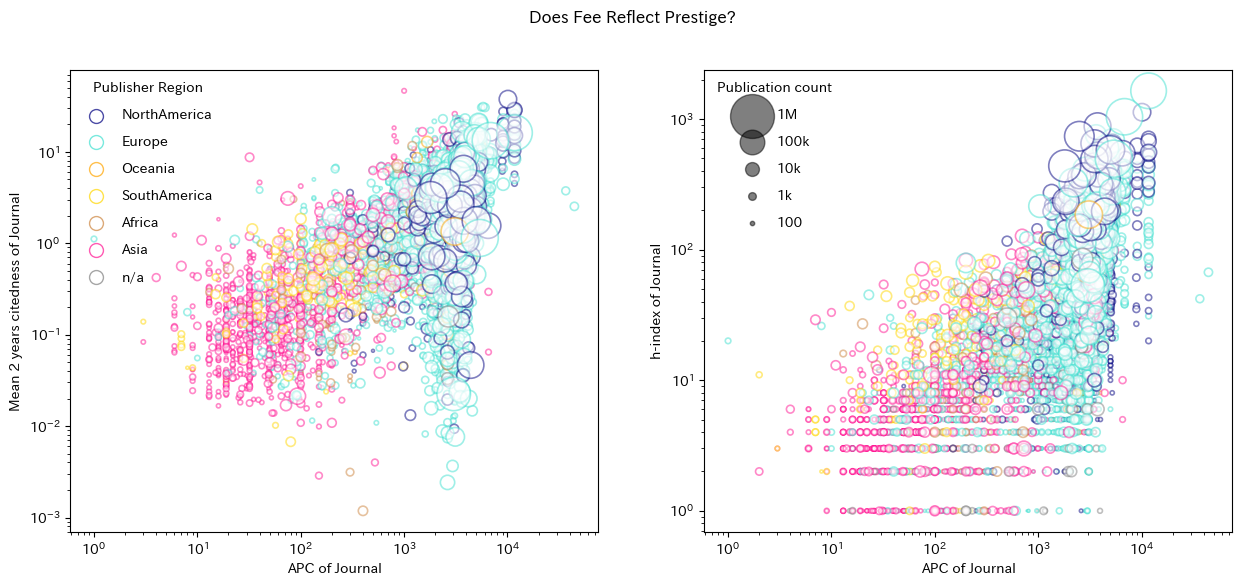

In [5]:
# visualize
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[0].set_ylabel("Mean 2 years citedness of Journal")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[1].set_ylabel("h-index of Journal")

for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of Journal")

legend_color = colors.values()
legend_labels_color = colors.keys()
for color, label in zip(legend_color, legend_labels_color):
    ax[0].scatter([], [], s=100, label=label, color='white',edgecolors=color, alpha=0.7)

legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    ax[1].scatter([], [], s=size, label=label, color='black', alpha=0.5)
ax[0].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publisher Region')
ax[1].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee Reflect Prestige?")
plt.show()

# Blue circle stands for Europe and North America, red for Asia、yellow for Global South.

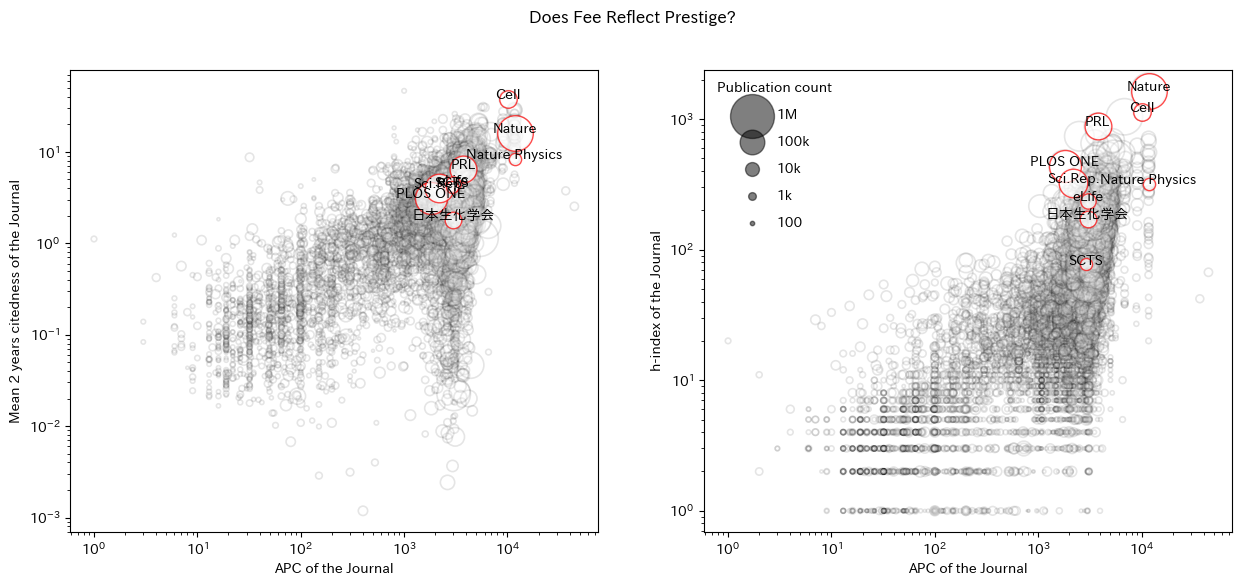

In [6]:
# Plots of prestigous journals.
# "Science", one of the most prestigeous journals in natural science, is not on the list, as it only have subscription scheme. 

prestigous_jounals = ["Nature","Nature Physics","PLOS ONE","Scientific Reports","Physical Review Letters","PubMed","Cell","eLife","Science China Technological Sciences","The Journal of Biochemistry"]
prestigous_jounals_shortname = ["Nature","Nature Physics","PLOS ONE","Sci.Rep.","PRL","PubMed","Cell","eLife","SCTS","日本生化学会"]

label_index = []
for i in range(len(prestigous_jounals)):
    index = sorted[sorted["display_name"]==prestigous_jounals[i]].index
    if(len(index)>0):
        label_index.append(index[0])
    else:
        label_index.append(None)
        prestigous_jounals[i] = ""
        prestigous_jounals_shortname[i] = ""

# Visualization        
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[0].set_ylabel("Mean 2 years citedness of the Journal")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[1].set_ylabel("h-index of the Journal")

for i,l in enumerate(label_index):
    label = prestigous_jounals_shortname[i]
    if(label!=""):
        x=sorted.loc[l,"apc_usd"]
        size= math.sqrt(sorted.loc[l,"works_count"])
        y1=sorted.loc[l,"2yr_mean_citedness"]
        y2=sorted.loc[l,"h-index"]
        ax[0].annotate(label, (x, y1), textcoords="offset points", xytext=(0,0), ha='center')
        ax[1].annotate(label, (x, y2), textcoords="offset points", xytext=(0,0), ha='center')
        ax[0].scatter(x, y1,c="white",s=size,edgecolors="red",alpha=0.7)
        ax[1].scatter(x, y2,c="white",s=size,edgecolors="red",alpha=0.7)
    
for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of the Journal")

# Custom legend for bubble sizes
legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.5)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee Reflect Prestige?")
plt.show()

# Institutions
Data for research institutions and universities. It includes hospitals, libraries and companies.

In [8]:
# Institutions
# Highest ten h-index institutions in a country.
# Here we show a institution ranking in UK as an example.

country = "GB"

institution = Institutions().filter(country_code=country).sort(summary_stats={"h-index":"desc"}).get()

pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["h_index"],x["id"]],institution),
            columns=["Institution Name","h-index","id"]).head(10)

Empty DataFrame
Columns: [機関名, h-index, id]
Index: []

In [3]:
# Different metrics produces different rankings.

institution = Institutions().filter(country_code=country).sort(summary_stats={"2yr_mean_citedness":"desc"}).get()
pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["2yr_mean_citedness"],x["id"]],institution),
            columns=["Institution Name","2 year mean citedness","id"]).head(10)

機関名  2年間平均被引用数  \
0  Chiba Prefectural Center Museum Otone Branch  71.000000   
1                   Institute of Applied Energy  20.111111   
2                               Tomita Hospital  18.000000   
3               Kyushu Economic Research Center  17.818182   
4                            Katsumata Hospital  16.500000   
5           Japan Chemical Industry Association  15.862069   
6    Toyama University of International Studies  15.500000   
7      Mitsukoshi Health and Welfare Foundation  14.800000   
8                               Menicon (Japan)  13.600000   
9                           Nippon Soda (Japan)  13.071429   

                                 id  
0  https://openalex.org/I4210105858  
1  https://openalex.org/I4210147409  
2  https://openalex.org/I4210112518  
3  https://openalex.org/I4210090332  
4  https://openalex.org/I4210143263  
5  https://openalex.org/I4210120656  
6    https://openalex.org/I76257533  
7  https://openalex.org/I4210159217  
8  https://openalex.org/I4210124293  
9    https://openalex.org/I34165663

The results above sometimes just tells you which are the "richest" affiliations in your country.

In this section we uncover the diverse strength that an university has in topics by focusing on _Revealed Comperative Advantage_.
We calculate the fraction of a topic citation contribute to the total citations that the affiliation accrued, and compared to the global mean, which is obtained by dividing the total citation that the any paper from the discipline globally by the total citations that the whole document in the world have ever received.

This is useful as each topic receives different amount of citation, simply because each discipline has different publication frequency and reference standards.
Mathematics or social science studies tend to have less ciation count than biology or material sciences.
If one in fifty impact that an affiliation has received in mathmatics, it means that it has focus on the field, 
even if the total citation is less than that of engineering... since tipically the math only contribute sixtieth to seventieth to the total impact in the average institutions in the world. It does not depend on the institional size nor the number of publications.

*RCA origates from economic concept of countries "investment" in import and export of goods.
Total number of citations and publications may vary, but the global average will fall into certain range.
You can see more details and examples [here]()

![Definition of Revealed Comperative Advantage](./supplementary/1_rca.png)

, where $ X_{Ai} $ means the citation that an affiliation received for a topic $i$, $P$ stands for the group of topics, while $X_{Wi}$ is the sum of citations that all the institutions in the world received for a topic $i$ .

We focus on the topic $i$ such that the RCA for the topic is larger or equal to 1. 


ref. https://unctadstat.unctad.org/EN/RcaRadar.html

In [8]:
institution_id = "https://openalex.org/i125602781" # Medical and Dental University

rca_fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
for i in tqdm.tqdm(range(11,37)):
    pyalexObj = Works().filter(institution={"id":institution_id}, from_publication_date="2010-01-01",to_publication_date="2014-12-31",cited_by_count=">0",primary_topic={"field":{"id":i}})
    rca_fields.loc[i, "pub"] = pyalexObj.count()
    if rca_fields.loc[i, "pub"]>20:
        citation_counts = pd.DataFrame(util.getAll(pyalexObj.select(["cited_by_count"]), verbous=False))
        rca_fields.loc[i, "cite"] = citation_counts["cited_by_count"].sum()

100%|██████████| 26/26 [01:25<00:00,  3.30s/it]


In [ ]:
# Global mean is calculated from randomly selected 10,000 samples.
# As we see in Author example section, data retrieval takes huge time.
# We use pre-retrieved data.

# fields_base = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id").drop(["field_name","domain_name"], axis="columns")

# for i in range(11,37):
#     pyalexObj = Works().filter(from_publication_date="2010-01-01",to_publication_date="2014-12-31",\
#                                 cited_by_count=">0",\
#                                 # authorships={"institutions":{"country_code":"JP"}},\
#                                 primary_topic={"field":{"id":i}})
#     fields_base.loc[i, "pub"] = pyalexObj.count()
#     sample_count = int(min(10000,fields_base.loc[i, "pub"]))
#     if(sample_count>0):
#         citation_counts = pd.DataFrame(util.getAll(pyalexObj.sample(sample_count,seed=42).select(["cited_by_count"]),verbous=False))
#         fields_base.loc[i, "cite"] = citation_counts["cited_by_count"].sum()

# fields_base.to_pickle("./supplementary/fields_base_10k.pickle")

fields_base = pd.read_pickle("./supplementary/fields_base_10k.pickle")

In [6]:
rca = pd.merge(rca_fields.dropna(), fields_base,how="left", on="field_id")
rca["topic_citational_ratio"] = rca["cite_x"] / rca["cite_x"].sum()
rca["topic_global_mean_ratio"] = rca["cite_y"] / rca["cite_y"].sum()
rca["rca"] = rca["topic_citational_ratio"] / rca["topic_global_mean_ratio"]
rca

field_name  domain_id_x  \
field_id                                                              
13        Biochemistry, Genetics and Molecular Biology            1   
16                                           Chemistry            3   
22                                         Engineering            3   
23                               Environmental Science            3   
24                         Immunology and Microbiology            1   
25                                   Materials Science            3   
27                                            Medicine            4   
28                                        Neuroscience            1   
29                                             Nursing            4   
32                                          Psychology            2   
33                                     Social Sciences            2   
35                                           Dentistry            4   
36                                  Health Professions            4   

                domain_name   pub_x    cite_x  domain_id_y      pub_y  \
field_id                                                                
13            Life Sciences  1070.0   47390.0            1   903763.0   
16        Physical Sciences    59.0    1553.0            3   313080.0   
22        Physical Sciences   229.0    5465.0            3  1813363.0   
23        Physical Sciences    23.0     712.0            3   616122.0   
24            Life Sciences   296.0   16831.0            1   160252.0   
25        Physical Sciences    93.0    2291.0            3   559837.0   
27          Health Sciences  2477.0  105402.0            4  2544854.0   
28            Life Sciences   266.0   10746.0            1   267955.0   
29          Health Sciences    24.0     718.0            4    65630.0   
32          Social Sciences    29.0     635.0            2   380945.0   
33          Social Sciences    24.0     707.0            2  1242530.0   
35          Health Sciences   362.0   10621.0            4    61336.0   
36          Health Sciences   125.0    2682.0            4   265478.0   

            cite_y  
field_id            
13        398183.0  
16        308639.0  
22        205292.0  
23        287929.0  
24        380039.0  
25        364484.0  
27        295711.0  
28        391336.0  
29        273958.0  
32        256827.0  
33        141005.0  
35        215280.0  
36        164078.0

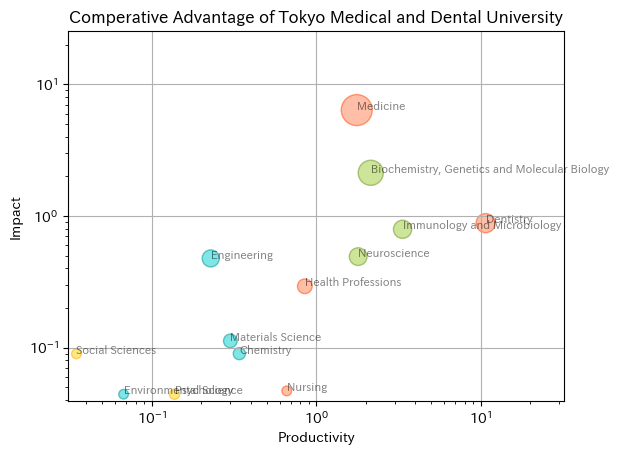

In [7]:
# Visualization
investment = (rca["pub_x"]/rca["pub_x"].sum()) / (rca["pub_y"]/rca["pub_y"].sum())
impact = (rca["cite_x"]/rca["cite_x"].sum()) / (rca["cite_y"]/rca["cite_y"].sum())

x_range = max(math.log10(max(investment)), -math.log10(min(investment)))
y_range = max(math.log10(max(impact)), -math.log10(min(impact)))

dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']
colors = rca["domain_id_x"].apply(lambda x: light_colors[x-1])
edgecolors = rca["domain_id_x"].apply(lambda x: dark_colors[x-1])

plt.scatter(investment,impact,s=rca["pub_x"].apply(lambda x: math.sqrt(x)*10),c=colors,edgecolors=edgecolors, alpha=0.5)
labels = rca["field_name"]
title = Institutions()[f'{institution_id.split(sep="/")[-1]}']["display_name"]
for i, txt in enumerate(labels):
    plt.text(investment.iloc[i], impact.iloc[i], txt, fontsize=8,alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.title(f"Comperative Advantage of {title}")
plt.xlim(10**(-x_range-0.05),10**(x_range+0.05))
plt.ylim(10**(-y_range-0.05),10**(y_range+0.05))
plt.xlabel("Productivity")
plt.ylabel("Impact")
plt.grid(True)